PACKAGE LOADING


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.ticker import FuncFormatter
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings

LOADIND  AND READING DATA SETS


In [2]:
# Load a CSV file into a pandas DataFrame
# Example: Replace 'your_file.csv' with your actual file path
# df = pd.read_csv('your_file.csv')
# df.head()

In [3]:
customers = pd.read_csv(r'C:\Users\easie\Desktop\Hackaton\customers.eCommerce.csv')
location = pd.read_csv(r'C:\Users\easie\Desktop\Hackaton\geolocation.eCommerce.csv')
leads_closed = pd.read_csv(r'C:\Users\easie\Desktop\Hackaton\leads_closed.eCommerce.csv')
leads_qualified = pd.read_csv(r'C:\Users\easie\Desktop\Hackaton\leads_qualified.eCommerce.csv')
items = pd.read_csv(r'C:\Users\easie\Desktop\Hackaton\order_items.eCommerce.csv')
payments = pd.read_csv(r'C:\Users\easie\Desktop\Hackaton\order_payments.eCommerce.csv')
reviews = pd.read_csv(r'C:\Users\easie\Desktop\Hackaton\order_reviews.eCommerce.csv')
orders = pd.read_csv(r'C:\Users\easie\Desktop\Hackaton\orders.eCommerce.csv')
category = pd.read_csv(r'C:\Users\easie\Desktop\Hackaton\product_category_name_translation.eCommerce.csv')
products = pd.read_csv(r'C:\Users\easie\Desktop\Hackaton\products.eCommerce.csv')
sellers = pd.read_csv(r'C:\Users\easie\Desktop\Hackaton\sellers.eCommerce.csv')

DATA INSPECTION

In [4]:
# Dictionary of your datasets
datasets = {
    "customers": customers,
    "location": location,
    "leads_closed": leads_closed,
    "leads_qualified": leads_qualified,
    "items": items,
    "payments": payments,
    "reviews": reviews,
    "orders": orders,
    "category": category,
    "products": products,
    "sellers": sellers
}

# Loop through each dataset
for name, df in datasets.items():
    print(f"\n{'='*40}")
    print(f"Dataset: {name}")
    print(f"{'='*40}\n")
    
    # Missing values (percentage)
    missing_percent = df.isnull().mean() * 100
    missing_df = missing_percent[missing_percent > 0].sort_values(ascending=False).to_frame(name='Missing (%)')
    if not missing_df.empty:
        display(missing_df)
    else:
        print("No missing values.")

    # Duplicates
    num_duplicates = df.duplicated().sum()
    print(f"\nNumber of duplicate rows: {num_duplicates}")

    # Describe as DataFrame
    print("\nDescriptive Statistics:")
    display(df.describe(include='all'))

    # Info
    print("\nInfo:")
    df.info() 


Dataset: customers

No missing values.

Number of duplicate rows: 0

Descriptive Statistics:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

Dataset: location

No missing values.

Number of duplicate rows: 261836

Descriptive Statistics:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB

Dataset: leads_closed



,Missing (%)
has_company,92.517815
has_gtin,92.399050
average_stock,92.161520
declared_product_catalog_size,91.805226
lead_behaviour_profile,21.021378
business_type,1.187648
lead_type,0.712589
business_segment,0.118765



Number of duplicate rows: 0

Descriptive Statistics:


,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
count,842,842,842,842,842,841,836,665,63.000000,64.000000,66,832,69.000000,8.420000e+02
unique,842,842,32,22,821,33,8,9,NaN,NaN,6,3,NaN,NaN
top,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,4b339f9567d060bcea4f5136b9f5949e,4ef15afb4b2723d8f3d81e51ec7afefe,5/4/2018 3:00,home_decor,online_medium,cat,NaN,NaN,20-May,reseller,NaN,NaN
freq,1,1,140,133,6,105,332,407,NaN,NaN,22,587,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.920635,0.843750,NaN,NaN,233.028986,7.337768e+04
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.272479,0.365963,NaN,NaN,352.380558,1.744799e+06
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,1.000000,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,30.000000,0.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,100.000000,0.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,300.000000,0.000000e+00



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mql_id                         842 non-null    object 
 1   seller_id                      842 non-null    object 
 2   sdr_id                         842 non-null    object 
 3   sr_id                          842 non-null    object 
 4   won_date                       842 non-null    object 
 5   business_segment               841 non-null    object 
 6   lead_type                      836 non-null    object 
 7   lead_behaviour_profile         665 non-null    object 
 8   has_company                    63 non-null     float64
 9   has_gtin                       64 non-null     float64
 10  average_stock                  66 non-null     object 
 11  business_type                  832 non-null    object 
 12  declared_product_catalog_size  69 non-null 

,Missing (%)
origin,0.75



Number of duplicate rows: 0

Descriptive Statistics:


,mql_id,first_contact_date,landing_page_id,origin
count,8000,8000,8000,7940
unique,8000,336,495,10
top,dac32acd4db4c29c230538b72f8dd87d,5/2/2018,b76ef37428e6799c421989521c0e5077,organic_search
freq,1,93,912,2296



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   mql_id              8000 non-null   object
 1   first_contact_date  8000 non-null   object
 2   landing_page_id     8000 non-null   object
 3   origin              7940 non-null   object
dtypes: object(4)
memory usage: 250.1+ KB

Dataset: items

No missing values.

Number of duplicate rows: 0

Descriptive Statistics:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,54615,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2/27/2018 3:31,NaN,NaN
freq,21,NaN,527,2033,55,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB

Dataset: payments

No missing values.

Number of duplicate rows: 0

Descriptive Statistics:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB

Dataset: reviews



,Missing (%)
review_comment_title,88.535987
review_comment_message,60.804630
review_answer_timestamp,8.920062
review_creation_date,8.902873
review_score,2.805604
order_id,2.667138
review_id,0.530945



Number of duplicate rows: 640

Descriptive Statistics:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,104163,101926,101781,12005,41045,95396,95378
unique,102957,99743,2435,4939,35902,654,85762
top,"""",12/19/2017 0:00,5,Recomendo,Muito bom,12/19/2017 0:00,8/12/2017 14:35
freq,29,16,57328,423,239,445,6



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104719 entries, 0 to 104718
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                104163 non-null  object
 1   order_id                 101926 non-null  object
 2   review_score             101781 non-null  object
 3   review_comment_title     12005 non-null   object
 4   review_comment_message   41045 non-null   object
 5   review_creation_date     95396 non-null   object
 6   review_answer_timestamp  95378 non-null   object
dtypes: object(7)
memory usage: 5.6+ MB

Dataset: orders



,Missing (%)
order_delivered_customer_date,2.981668
order_delivered_carrier_date,1.793023
order_approved_at,0.160899



Number of duplicate rows: 0

Descriptive Statistics:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,88789,50462,61544,75649,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,8/2/2018 12:06,1/10/2018 10:32,5/9/2018 15:48,7/24/2018 18:28,12/20/2017 0:00
freq,1,1,96478,28,109,47,7,522



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

Dataset: category

No missing values.

Number of duplicate rows: 0

Descriptive Statistics:


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB

Dataset: products



,Missing (%)
product_category_name,1.851234
product_name_lenght,1.851234
product_description_lenght,1.851234
product_photos_qty,1.851234
product_weight_g,0.006070
product_length_cm,0.006070
product_height_cm,0.006070
product_width_cm,0.006070



Number of duplicate rows: 0

Descriptive Statistics:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB

Dataset: sellers

No missing values.

Number of duplicate rows: 0

Descriptive Statistics:


,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


CUSTOMER INSIGHT

In [5]:
print(customers.head())
print(orders.head())
print(items.head())
print(payments.head())
print(location.head())

                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cd

## OBJECTIVES

 # CUSTOMER INSIGHT

We will need "customers" and "orders" datasets to help with the kind of analysis we want to do here

In [6]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


INSPECTION AND DATA CLEANING 

In [7]:
# checking basic information of the data
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [8]:
# Checking for duplicates
customers.duplicated().sum()

np.int64(0)

In [9]:
# change to object
customers['customer_zip_code_prefix'] = customers['customer_zip_code_prefix'].astype(object)

In [10]:
customers.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441,99441,99441
unique,99441,96096,14994,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,22790,sao paulo,SP
freq,1,17,142,15540,41746



Objective: To analyze customer behavior geographically and behaviorally, identify retention vs churn, and segment customers based on purchase frequency and spending power to unlock growth levers for the platform.

### 1. Purchasing Behavior by City/State (How active are customers by location)

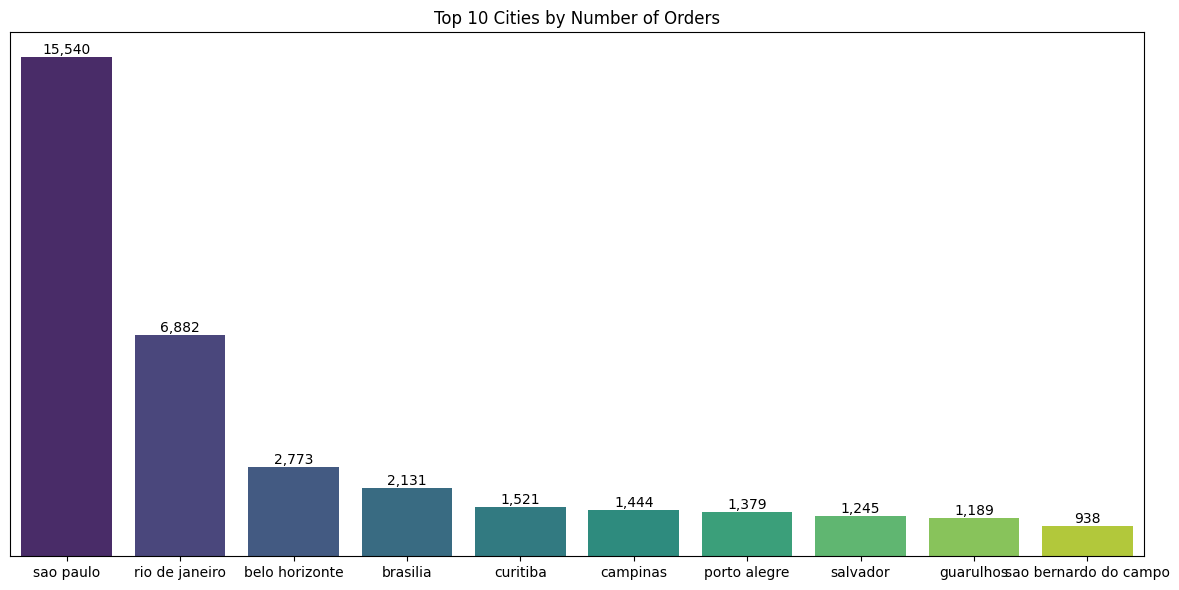

In [11]:
city_orders = (
    customers.merge(orders, on="customer_id")
    .groupby(["customer_city", "customer_state"])["order_id"]
    .nunique()
    .reset_index(name="num_orders")
    .sort_values("num_orders", ascending=False)
)

# Top 10 cities
top_cities = city_orders.head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_cities, x="customer_city", y="num_orders", palette="viridis")

# Title and labels
plt.title("Top 10 Cities by Number of Orders")
plt.ylabel("Number of Orders")
plt.xlabel("City")
plt.ylabel("")  # Hide y-axis label
plt.xlabel("")  # Hide x-axis label
plt.yticks([])  # Hide x-axis values

# Remove grid
plt.grid(False)

# Add data labels with comma separator
for index, value in enumerate(top_cities["num_orders"]):
    plt.text(index, value, f"{value:,}", color='black', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Detailed Analysis of Top 10 Cities by Number of Orders

## Overview
The provided chart presents the top 10 cities based on the number of orders placed by customers. This analysis will explore various aspects including city performance, customer behavior, and potential business recommendations.

## Key Observations

1. **Order Distribution**:
   - **São Paulo** stands out as the clear leader, accounting for **15,540 orders**. This is significantly higher than the second city, **Rio de Janeiro**, which has **6,862 orders**.
   - The gap between São Paulo and other cities indicates a strong market presence, suggesting it could be a primary target for marketing and promotional strategies.
   - The remaining cities (Belo Horizonte, Brasília, Curitiba, Campinas, Porto Alegre, Salvador, and Guarulhos/Bernardo do Campo) have orders ranging from approximately **900 to 2,800**, showing a steep decline after the top two cities.

2. **Market Concentration**:
   - The top two cities (São Paulo and Rio de Janeiro) represent a large portion of the total orders. This concentration may indicate higher urbanization and population density, leading to increased consumer demand.
   - The remaining cities have much lower order counts, suggesting opportunities for growth in markets that are currently underperforming.

3. **Potential for Growth**:
   - Cities like **Belo Horizonte (2,773)** and **Curitiba (1,521)** show moderate order numbers and could be targeted for growth strategies, such as localized marketing campaigns or special promotions.
   - The lower-performing cities (Salvador, Guarulhos/Bernardo do Campo) should be analyzed further to identify barriers to customer engagement or order placement.

4. **Customer Behavior Insights**:
   - The stark contrast in order numbers suggests varying levels of customer engagement, preferences, and purchasing power across cities.
   - Understanding local consumer behavior and preferences is crucial; for instance, São Paulo's diverse population may lead to varied product demand.

## Business Recommendations

1. **Targeted Marketing Campaigns**:
   - Develop localized marketing strategies for São Paulo and Rio de Janeiro to capitalize on their high order volumes. This could include special promotions, loyalty programs, or partnerships with local influencers.
   - For cities with lower order numbers, consider targeted advertisements that highlight products or services tailored to local preferences.

2. **Market Research and Customer Feedback**:
   - Conduct surveys or focus groups in underperforming cities to gather insights on customer preferences, barriers to purchase, and brand perception. Use this data to refine product offerings and marketing strategies.

3. **Expansion of Product Range**:
   - Look at the product preferences in top cities and consider expanding the product range in those areas to boost sales further. 
   - For cities with lower order volumes, consider introducing products that resonate with local culture or needs.

4. **Logistical Improvements**:
   - Ensure efficient delivery systems in high-order cities like São Paulo and Rio de Janeiro to maintain customer satisfaction and encourage repeat business.
   - Investigate logistical challenges in lower-order cities that may hinder order fulfillment and work to improve these processes.

5. **Promotional Events**:
   - Organize community events or pop-up stores in cities with lower order numbers to increase brand visibility and engagement.
   - Collaborate with local businesses for cross-promotions that can enhance brand reach and customer loyalty.

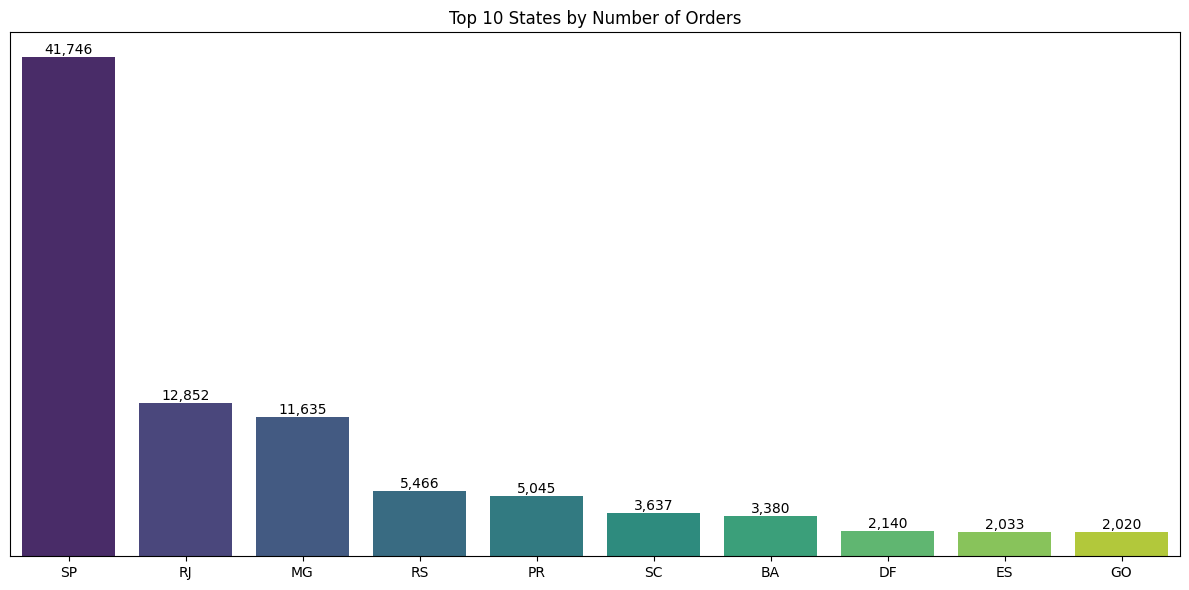

In [12]:
# Group by customer_state
state_orders = (
    customers.merge(orders, on="customer_id")
    .groupby("customer_state")["order_id"]
    .nunique()
    .reset_index(name="num_orders")
    .sort_values("num_orders", ascending=False)
)

# Top 10 states
top_states = state_orders.head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_states, x="customer_state", y="num_orders", palette="viridis")

# Title and labels
plt.title("Top 10 States by Number of Orders")
plt.ylabel("Number of Orders")
plt.xlabel("State")
plt.ylabel("")  # Hide y-axis label
plt.xlabel("")  # Hide x-axis label
plt.yticks([])  # Hide y-axis values

# Remove grid
plt.grid(False)

# Add data labels with comma separator
for index, value in enumerate(top_states["num_orders"]):
    plt.text(index, value, f"{value:,}", color='black', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Detailed Analysis of Top 10 States by Number of Orders

## Overview
The chart illustrates the distribution of orders across the top 10 states, highlighting significant differences in customer engagement and purchasing behavior. This analysis will delve into the performance of each state, assess market dynamics, and propose strategic recommendations for business growth.

## Key Observations

1. **Order Distribution**:
   - **São Paulo (SP)** leads with a staggering **41,746 orders**, far exceeding all other states. This indicates a highly engaged customer base and strong market presence.
   - The second highest, **Rio de Janeiro (RJ)**, has **12,852 orders**, significantly lower than São Paulo, suggesting a potential market gap.
   - Other states like **Minas Gerais (MG)** with **11,635** orders and **Rio Grande do Sul (RS)** with **5,466** orders show moderate engagement but still trail far behind the top two states.

2. **Market Concentration**:
   - The top two states (SP and RJ) account for a significant majority of the total orders, indicating a concentrated market. This could reflect higher urbanization and consumer purchasing power in these regions.
   - The remaining states (PR, SC, BA, DF, ES, GO) have order counts ranging from approximately **2,000 to 5,000**, highlighting opportunities for increasing market penetration.

3. **Growth Potential**:
   - States like **Minas Gerais and Rio Grande do Sul** exhibit moderate order volumes and can be targeted for growth strategies, such as localized marketing or promotional events.
   - Lower-performing states (e.g., Goiás and Espírito Santo) may require deeper analysis to understand barriers to customer engagement.

4. **Consumer Behavior Insights**:
   - The stark differences in order numbers suggest varying customer preferences and engagement levels across states. Understanding local consumer behavior, preferences, and economic conditions is critical for tailored marketing strategies.

## Business Recommendations

1. **Targeted Marketing Initiatives**:
   - Develop localized marketing campaigns in São Paulo and Rio de Janeiro to leverage their high order volumes. Consider partnerships with local influencers and targeted promotions to enhance brand visibility.
   - For states with moderate orders like Minas Gerais and Rio Grande do Sul, initiate targeted advertisements that resonate with local culture and needs.

2. **Market Research and Customer Feedback**:
   - Conduct surveys or focus groups in lower-performing states to gain insights into customer preferences, barriers to purchase, and brand perception. Utilize this data to inform product offerings and marketing strategies.

3. **Expansion of Product Offerings**:
   - Assess product preferences in high-order states and consider expanding offerings in these regions to boost sales. Tailor products to meet local needs, especially in states with moderate engagement.

4. **Enhancing Logistics and Delivery**:
   - Ensure efficient logistics and delivery systems in high-order states like São Paulo and Rio de Janeiro to maintain customer satisfaction and encourage repeat purchases.
   - Investigate and address logistical challenges in lower-performing states to improve order fulfillment and customer experience.

5. **Promotional Events and Community Engagement**:
   - Organize community events or pop-up stores in states with lower order volumes to increase brand awareness and customer engagement. Collaborate with local businesses for cross-promotions to enhance brand reach.

### 2. Retention vs Churn

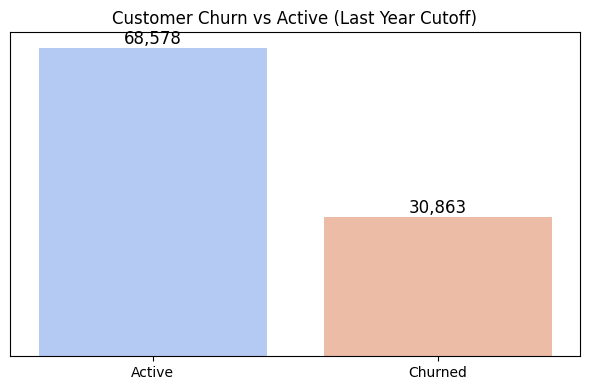

status
Active     68.963506
Churned    31.036494
Name: proportion, dtype: float64


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert dates
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])

# Step 2: Find latest purchase date in dataset
last_date = orders["order_purchase_timestamp"].max()

# Churn threshold — 360 days before last purchase
churn_cutoff = last_date - pd.Timedelta(days=360)

# Last purchase date per customer
last_purchase = orders.groupby("customer_id")["order_purchase_timestamp"].max().reset_index()
last_purchase["status"] = np.where(last_purchase["order_purchase_timestamp"] < churn_cutoff, "Churned", "Active")

# Plot churn vs active
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=last_purchase, x="status", palette="coolwarm")

# Title and labels
plt.title("Customer Churn vs Active (Last Year Cutoff)")
plt.xlabel("Status")
plt.ylabel("Number of Customers")
plt.ylabel("")  # Hide y-axis label
plt.xlabel("")  # Hide x-axis label
plt.yticks([])  # Hide y-axis values

# Add data labels with comma separator
for p in ax.patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height(), f"{int(p.get_height()):,}", 
             ha='center', va='bottom', color='black', fontsize=12)

plt.tight_layout()
plt.show()

# Print percentage
print(last_purchase["status"].value_counts(normalize=True) * 100)

# Detailed Analysis of Customer Churn vs. Active Status

## Overview
The chart illustrates the distribution of customers categorized as "Active" (68,578) and "Churned" (30,863), highlighting a significant churn rate of approximately 31%. This indicates that nearly one-third of the customer base has not engaged with the brand in the past year, signifying a critical area for improvement.

## Key Observations

1. **Active Customers**: A robust base of active customers shows potential for increased sales and loyalty.
2. **Churned Customers**: A significant number of churned customers suggests underlying issues that need to be addressed to improve retention.

## Strategic Recommendations

### 1. Customer Retention Programs
- **Loyalty Programs**: Implement a rewards program that incentivizes repeat purchases. Offer points for every purchase that can be redeemed for discounts or exclusive products.
- **Personalized Communication**: Use data analytics to segment customers based on behavior and preferences. Send tailored emails with product recommendations, special offers, or content that aligns with their interests.

### 2. Re-Engagement Campaigns
- **Targeted Win-Back Campaigns**: Design campaigns specifically aimed at churned customers. Use personalized emails with special discounts or exclusive access to new products to encourage them to return.
- **Feedback Loop**: Reach out to churned customers to understand their reasons for leaving. Use surveys or direct communication to gather insights and show that their opinions matter.

### 3. Improve Customer Experience
- **Enhance Customer Support**: Ensure that customer support is easily accessible and responsive. Consider implementing a chatbot for quick queries and a robust FAQ section.
- **Streamline the Purchase Process**: Analyze the checkout process to identify and eliminate any pain points. A smoother purchasing experience can reduce cart abandonment rates.

### 4. Regular Engagement
- **Content Marketing**: Create engaging content that adds value to customers, such as how-to guides, product usage tips, and industry news. This keeps the brand top-of-mind and fosters a sense of community.
- **Social Media Interaction**: Actively engage with customers on social media platforms. Respond to comments and messages promptly and create interactive content such as polls or contests.

### 5. Product Development
- **Tailored Product Offerings**: Analyze the preferences of active customers to develop new products or services that meet their needs. Consider introducing limited-edition items or subscription services.
- **Quality Assurance**: Ensure that the products offered meet high-quality standards. Address any quality issues that may lead to customer dissatisfaction and churn.

In [14]:
# Ensure datetime columns are parsed
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])
orders["order_delivered_customer_date"] = pd.to_datetime(orders["order_delivered_customer_date"])
orders["order_estimated_delivery_date"] = pd.to_datetime(orders["order_estimated_delivery_date"])

# Remove rows with missing delivery dates
delivered_orders = orders.dropna(subset=["order_delivered_customer_date", "order_estimated_delivery_date"])

# Calculate actual delivery time and delay
delivered_orders["actual_delivery_time"] = (
    delivered_orders["order_delivered_customer_date"] - delivered_orders["order_purchase_timestamp"]
).dt.days

delivered_orders["delivery_delay"] = (
    delivered_orders["order_delivered_customer_date"] - delivered_orders["order_estimated_delivery_date"]
).dt.days

# Categorize: Early, On time, Late
delivered_orders["delivery_status"] = delivered_orders["delivery_delay"].apply(
    lambda x: "Early" if x < 0 else ("On Time" if x == 0 else "Late")
)

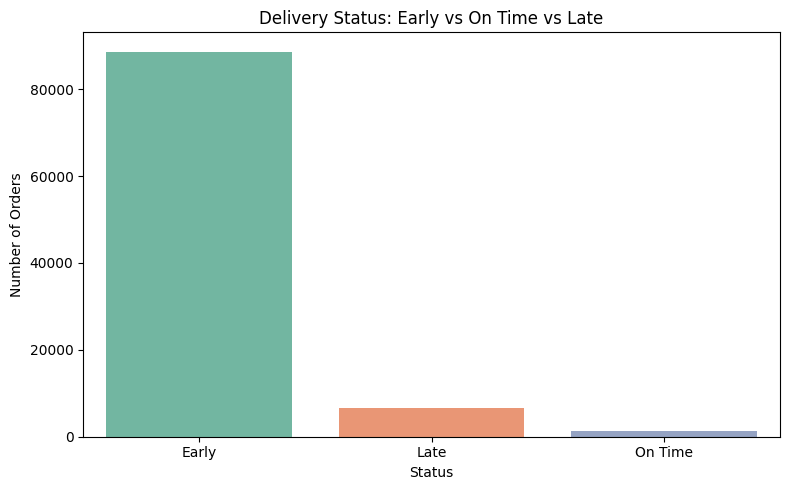

In [15]:
# Count of delivery status
plt.figure(figsize=(8, 5))
sns.countplot(data=delivered_orders, x="delivery_status", palette="Set2")
plt.title("Delivery Status: Early vs On Time vs Late")
plt.xlabel("Status")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()

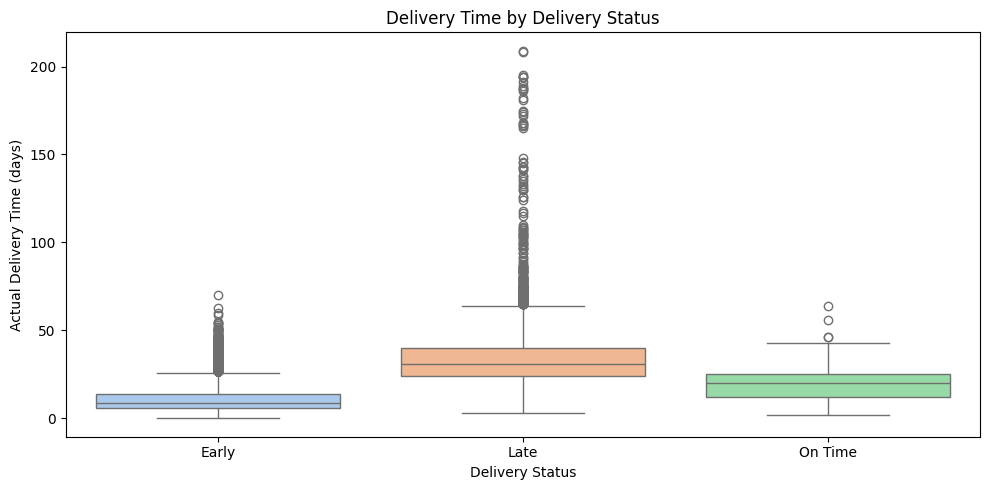

In [16]:
# Compare Delivery Time for Early vs Late Deliveries
plt.figure(figsize=(10, 5))
sns.boxplot(data=delivered_orders, x="delivery_status", y="actual_delivery_time", palette="pastel")
plt.title("Delivery Time by Delivery Status")
plt.xlabel("Delivery Status")
plt.ylabel("Actual Delivery Time (days)")
plt.tight_layout()
plt.show()

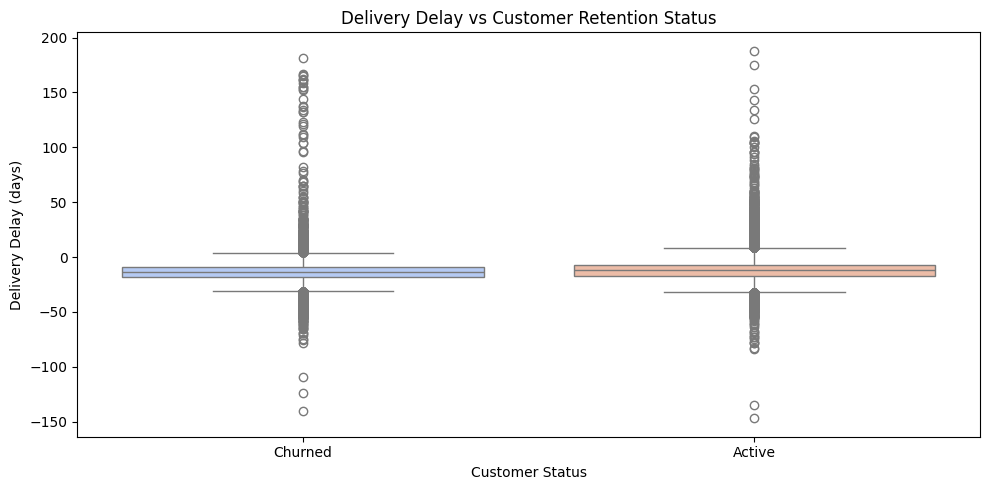

status
Active    -11.150093
Churned   -13.519651
Name: delivery_delay, dtype: float64


In [17]:
# Merge with customer retention (from churn analysis)
orders_with_retention = delivered_orders.merge(last_purchase, on="customer_id")

# Check if late deliveries influence churn
plt.figure(figsize=(10, 5))
sns.boxplot(data=orders_with_retention, x="status", y="delivery_delay", palette="coolwarm")
plt.title("Delivery Delay vs Customer Retention Status")
plt.xlabel("Customer Status")
plt.ylabel("Delivery Delay (days)")
plt.tight_layout()
plt.show()

# Average delivery delay by status
print(orders_with_retention.groupby("status")["delivery_delay"].mean())

### 3.Purchase Frequency vs order value

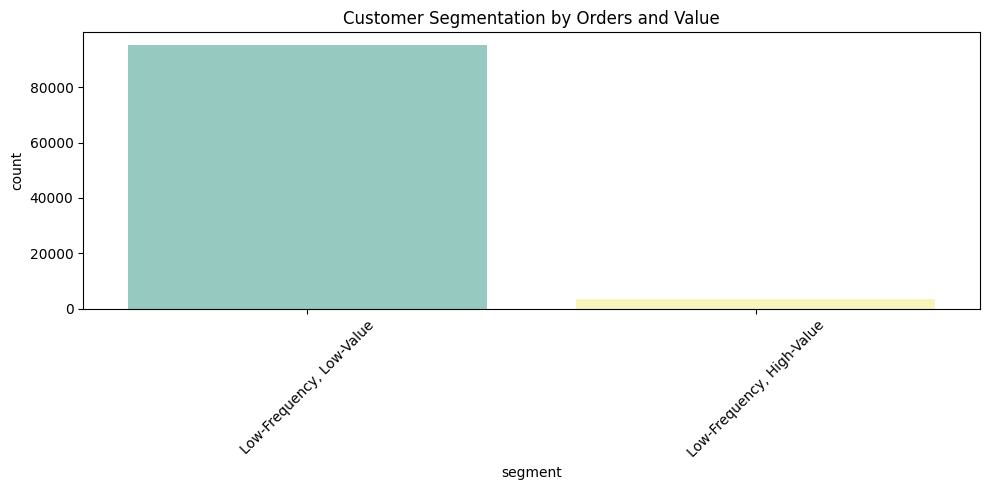

In [18]:
# Total spending per customer
order_item_value = items.groupby("order_id")["price"].sum().reset_index()
order_customer = orders[["order_id", "customer_id"]].merge(order_item_value, on="order_id")

customer_value = order_customer.groupby("customer_id").agg({
    "order_id": "count",
    "price": "sum"
}).reset_index().rename(columns={"order_id": "num_orders", "price": "total_value"})

# Segment Logic
def segment(row):
    if row["num_orders"] > 2 and row["total_value"] > 500:
        return "High-Frequency, High-Value"
    elif row["num_orders"] <= 2 and row["total_value"] > 500:
        return "Low-Frequency, High-Value"
    elif row["num_orders"] > 2 and row["total_value"] <= 500:
        return "High-Frequency, Low-Value"
    else:
        return "Low-Frequency, Low-Value"

customer_value["segment"] = customer_value.apply(segment, axis=1)

# Count segments
segment_count = customer_value["segment"].value_counts().reset_index()
segment_count.columns = ["segment", "count"]

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=segment_count, x="segment", y="count", palette="Set3")
plt.title("Customer Segmentation by Orders and Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




##  General Overview

In this analysis, we explored customer behavior by segmenting them based on two key dimensions: **purchase frequency** and **average order value**. Our findings revealed the existence of two primary customer segments. The first and largest group consists of customers who make purchases infrequently and spend relatively low amounts—classified as *Low-Frequency, Low-Value* customers. The second, much smaller group, comprises customers who also buy infrequently but spend significantly more per order—referred to as *Low-Frequency, High-Value* customers. This pattern suggests that the overall customer base is largely composed of low-spending individuals with infrequent buying habits, indicating potential opportunities for strategic engagement and value maximization.

##  Key Observation

- The majority of customers fall into the **Low-Frequency, Low-Value** segment.
- A smaller, niche segment represents **Low-Frequency, High-Value** customers.
- The customer base is dominated by infrequent, low-spending buyers.

##  Strategic Recommendations

### 1. Retain and Upsell Low-Frequency, Low-Value Customers
To maximize value from the largest customer segment, implement strategies such as:
- Loyalty programs to encourage repeat purchases
- Personalized promotions and timely discounts
- Targeted email marketing to re-engage inactive customers

These efforts aim to increase both purchase frequency and average order value over time.

### 2. Engage and Protect High-Value Customers
Although small in number, Low-Frequency, High-Value customers represent a lucrative segment. To retain and grow this group:
- Offer exclusive deals and early access to new products
- Provide premium customer support or VIP experiences
- Introduce incentives for more frequent purchases, like curated bundles or subscription offers




### Overview

# Sales Performance Analysis

1. Determine Top-Performing Product Categories, Sellers, and Regions

Top 10 Product Categories by Total Sales

,total_sales,num_orders,num_items
product_category_name_english,,,
health_beauty,1258681.34,8836,9670
watches_gifts,1205005.68,5624,5991
bed_bath_table,1036988.68,9417,11115
sports_leisure,988048.97,7720,8641
computers_accessories,911954.32,6689,7827
furniture_decor,729762.49,6449,8334
cool_stuff,635290.85,3632,3796
housewares,632248.66,5884,6964
auto,592720.11,3897,4235


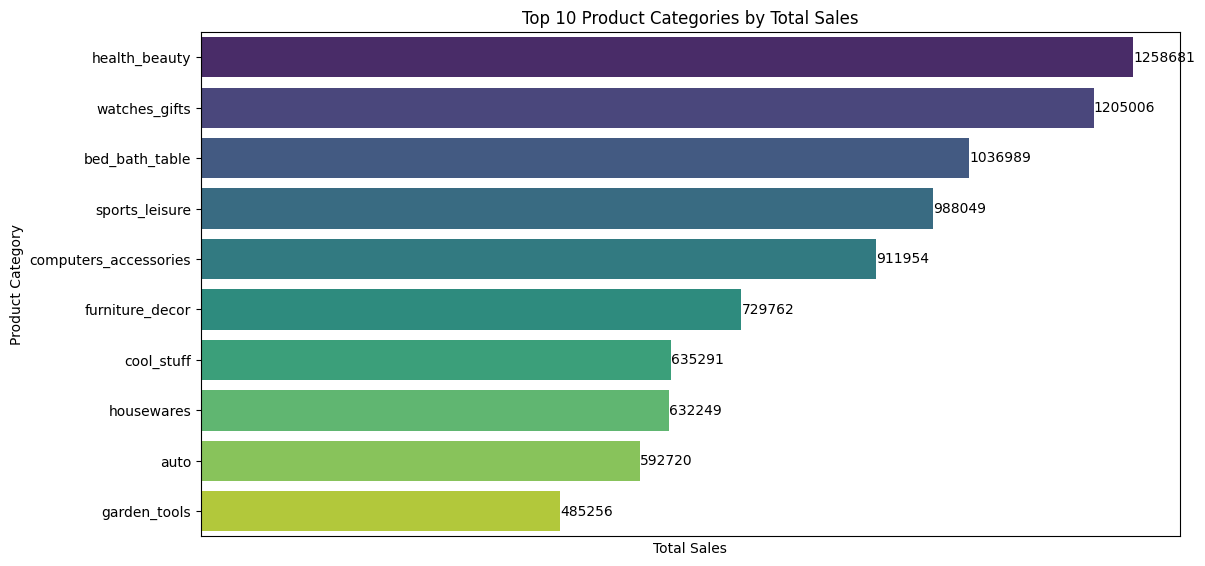

In [19]:
# Merge order_items with products and category
prod_cat = items.merge(products, on='product_id', how='left') \
                     .merge(category, on='product_category_name', how='left')

# Aggregate total sales and order count by category
cat_perf = prod_cat.groupby('product_category_name_english').agg(
    total_sales=('price', 'sum'),
    num_orders=('order_id', 'nunique'),
    num_items=('order_id', 'count')
).sort_values('total_sales', ascending=False)

display(cat_perf.head(10))
import matplotlib.pyplot as plt
import seaborn as sns

# Sort and prepare the data
cat_perf_sorted = cat_perf.sort_values(by='total_sales', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=cat_perf_sorted, x='total_sales', y='product_category_name_english', palette='viridis')

plt.title('Top 10 Product Categories by Total Sales')
plt.xlabel('Total Sales')  # Keep axis title
plt.ylabel('Product Category')
plt.tight_layout()

#  Hide only the tick values but keep the axis title
ax.set_xticks([])  # Removes the tick marks and their labels, axis title remains

# Add data labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.show()




##  Overview

The analysis focuses on identifying the top 10 product categories by total sales. Among these, **Health & Beauty** leads significantly with total sales amounting to **1,258,681**, followed by **Watches & Gifts** and **Bed, Bath & Table**, which also show strong performance with sales figures of **1,205,006** and **1,036,989** respectively. In contrast, **Garden Tools**, while still within the top 10, shows the lowest sales at **485,256**. This wide gap between the highest and lowest in the top 10 suggests a significant concentration of consumer spending in a few key categories.

##  Key Insight

- **Health & Beauty** is the top-performing category.
- **Watches & Gifts** and **Bed, Bath & Table** closely follow.
- A steep drop is observed from the top 3 to the remaining categories.
- **Garden Tools**, the 10th ranked category, earns less than half the revenue of Health & Beauty.

##  Business Recommendations

### 1. Double Down on Top Performers
- **Scale inventory and marketing** for the top 3 categories: *Health & Beauty*, *Watches & Gifts*, and *Bed, Bath & Table*.
- These are clearly your core revenue drivers and warrant increased attention in supply chain and advertising.

### 2. Boost Visibility for Low Performers
- Use **bundling** or **cross-promotion** strategies to lift sales in underperforming segments like *Garden Tools*.
- Pair them with high-traffic products to improve their visibility and appeal.

### 3. Leverage Consumer Insights
- Conduct **customer behavior analysis** in high-performing categories to identify what resonates with buyers.
- Apply those insights—messaging, pricing, product features—to optimize lower-performing categories.


Top 10 Sellers by Total Sales

,seller_id,seller_city,seller_state,total_sales,num_orders,num_items
0,4869f7a5dfa277a7dca6462dcf3b52b2,guariba,SP,229472.63,1132,1156
1,53243585a1d6dc2643021fd1853d8905,lauro de freitas,BA,222776.05,358,410
2,4a3ca9315b744ce9f8e9374361493884,ibitinga,SP,200472.92,1806,1987
3,fa1c13f2614d7b5c4749cbc52fecda94,sumare,SP,194042.03,585,586
4,7c67e1448b00f6e969d365cea6b010ab,itaquaquecetuba,SP,187923.89,982,1364
5,7e93a43ef30c4f03f38b393420bc753a,barueri,SP,176431.87,336,340
6,da8622b14eb17ae2831f4ac5b9dab84a,piracicaba,SP,160236.57,1314,1551
7,7a67c85e85bb2ce8582c35f2203ad736,sao paulo,SP,141745.53,1160,1171
8,1025f0e2d44d7041d6cf58b6550e0bfa,sao paulo,SP,138968.55,915,1428
9,955fee9216a65b617aa5c0531780ce60,sao paulo,SP,135171.70,1287,1499


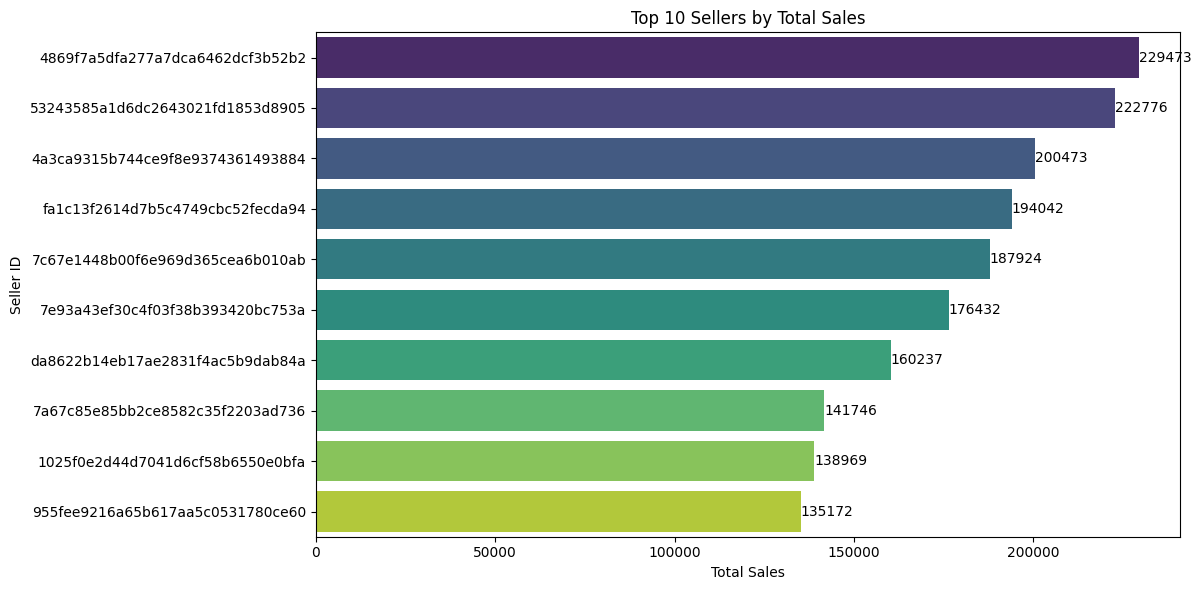

In [20]:
# Merge order_items with sellers to get seller region info
seller_perf = items.merge(sellers, on='seller_id', how='left')

# Aggregate total sales and order count by seller_id, seller_city, seller_state
seller_summary = seller_perf.groupby(['seller_id', 'seller_city', 'seller_state']).agg(
    total_sales=('price', 'sum'),
    num_orders=('order_id', 'nunique'),
    num_items=('order_id', 'count')
).sort_values('total_sales', ascending=False).reset_index()

# Display top 10 sellers by total sales
display(seller_summary.head(10))

# Plot top 10 sellers by total sales
plt.figure(figsize=(12, 6))
top_sellers = seller_summary.head(10)
ax = sns.barplot(data=top_sellers, x='total_sales', y='seller_id', palette='viridis')
plt.title('Top 10 Sellers by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Seller ID')
plt.tight_layout()

# ✅ Add values on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')  # Whole numbers, no decimals

plt.show()




##  Overview

This analysis ranks the top 10 sellers based on their total revenue generation. The leading seller, identified as `4869f7a5dfa277a7dca6462dcf3b52b2`, achieved total sales of **229,473**, making them the highest revenue contributor in the dataset. The seller in 10th place recorded **135,172** in total sales. This shows a relatively balanced but still competitive distribution within the top tier, where sellers are generating significant revenue, albeit with some gaps between performance levels.

##  Key Insight

- The **top seller** leads with 229,473 in total sales.
- The **10th-ranked seller** earned 135,172, resulting in a **difference of 94,301**.
- The **top three sellers combined** contribute over **652,722** in sales.
- This reflects a competitive seller environment with clear high performers.

##  Business Recommendations

### 1. Strengthen Relationships with Top Sellers
- Offer **exclusive partnerships**, rewards, or tiered benefits to top-performing sellers.
- Maintain their **loyalty and engagement** by recognizing their impact on overall revenue.

### 2. Motivate and Uplift Mid-Tier Sellers
- Launch a **"Rising Star" incentive program** to support and recognize growing sellers.
- Provide **training, promotional opportunities**, or visibility perks to drive performance.

### 3. Share Best Practices Across the Seller Network
- Analyze what top sellers excel at—whether it's **product mix, pricing strategies, delivery performance**, or customer experience.
- Turn these insights into **actionable tips or training sessions** for the broader seller base.


Seller Sales by Brazilian State

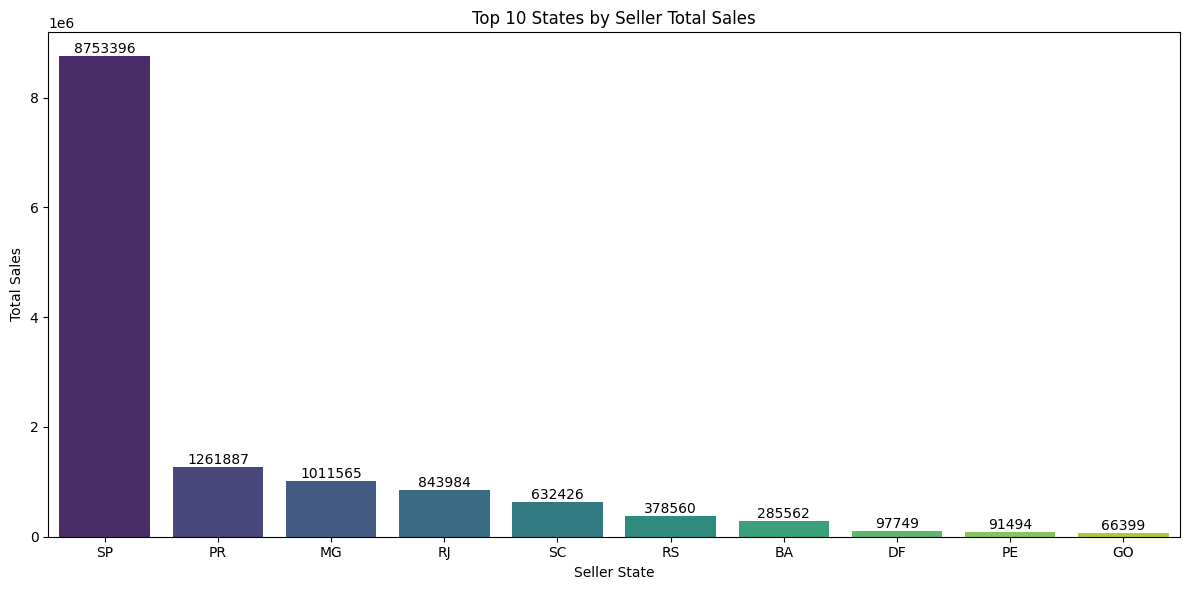

In [21]:
# Merge order_items with sellers to get seller region info
region_perf = items.merge(sellers, on='seller_id', how='left')

# Aggregate total sales and order count by seller_state
region_summary = region_perf.groupby('seller_state').agg(
    total_sales=('price', 'sum'),
    num_orders=('order_id', 'nunique'),
    num_items=('order_id', 'count')
).sort_values('total_sales', ascending=False).reset_index()

# Display top 10 states by total sales
top_regions = region_summary.head(10)

# Plot top 10 regions by total sales
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_regions, x='seller_state', y='total_sales', palette='viridis')
plt.title('Top 10 States by Seller Total Sales')
plt.xlabel('Seller State')
plt.ylabel('Total Sales')
plt.tight_layout()

# Add values on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.show()



##  Overview

This analysis highlights total seller sales distributed across Brazilian states. The data reveals a stark concentration of revenue in **São Paulo (SP)**, which leads with an impressive **8,753,396** in sales. This figure vastly outpaces the next state, **Paraná (PR)**, which follows with **1,261,887**. The third highest, **Minas Gerais (MG)**, also contributes significantly. At the lower end of the top 10, **Goiás (GO)** registers just **66,399** in total sales. These disparities indicate that revenue is heavily centralized in a few states, particularly São Paulo.

##  Key Insight

- **São Paulo (SP)** generates **6x** more sales than the next leading state, PR.
- The **top 3 states (SP, PR, MG)** account for over **11 million** in combined sales.
- Revenue is highly **concentrated in southeastern regions**, while northern and midwestern states contribute minimally.

##  Business Recommendations

### 1. Maximize São Paulo’s Potential
- Intensify **regional marketing** and **logistics optimization** in São Paulo.
- Focus resources on maintaining and expanding this **core revenue hub**.

### 2. Expand Strategically in Underperforming States
- Explore **growth strategies** in scalable but low-performing regions like **Distrito Federal (DF)**, **Pernambuco (PE)**, and **Goiás (GO)**.
- Launch **region-specific promotions** and **targeted seller onboarding** campaigns to drive adoption and sales growth.



2.Identify trends in payment methods and revenue streams.

Total Revenue by Payment Method

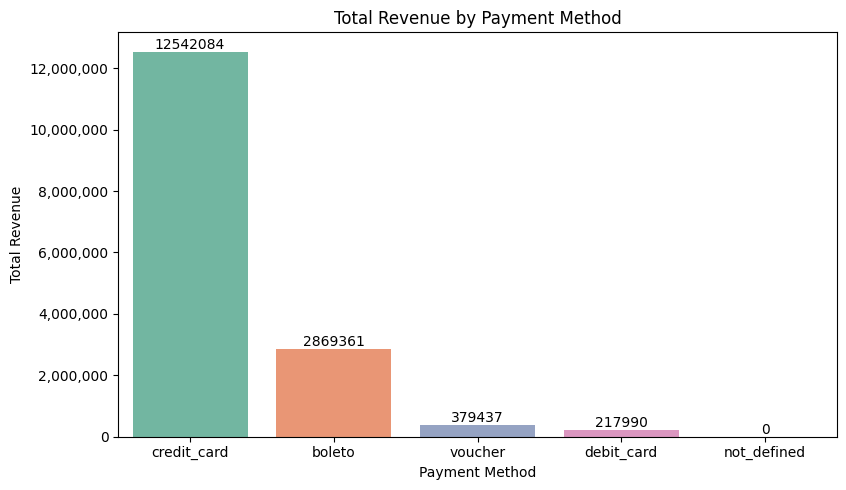

In [22]:
import matplotlib.ticker as ticker

# Payment method preference
payment_pref = payments.groupby("payment_type")["payment_value"].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=payment_pref, x="payment_type", y="payment_value", palette="Set2")
plt.title("Total Revenue by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Total Revenue")
plt.tight_layout()

# Add total revenue labels on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')  # Whole numbers

#  Force y-axis to show full numbers, not scientific notation
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

plt.show()







#  Payment Method Revenue Analysis

##  Overview

This bar chart illustrates the total revenue generated by various payment methods. The data reveals a strong dominance of **credit card transactions**, which account for **12,542,084** in revenue—by far the largest share. Following this, **boleto** (a popular Brazilian offline payment method) contributes a solid **2,869,361**. In contrast, other methods like **vouchers (379,437)** and **debit cards (217,990)** lag far behind. The **not_defined** category accounts for zero revenue, potentially due to data tracking issues. This skewed distribution emphasizes a heavy reliance on digital, particularly credit-based, payments in e-commerce behavior.

##  Key Insight

- **Credit cards** generate over **76%** of total revenue (~12.54M out of ~16M).
- **Boleto** follows with **17.9%**, indicating relevance among traditional or unbanked customers.
- **Vouchers** and **debit cards**, combined, contribute less than **4%** (~600K).
- **Not_defined** records **zero revenue**, suggesting data hygiene or categorization issues.

This highlights a strong customer preference for flexible, secure, and digital payment methods—especially credit cards.

## Business Recommendations

### 1. Optimize for Credit Card Transactions
- Ensure **seamless integration** with major credit card processors to maintain reliability and trust.
- Offer **installment plans**, **cashback rewards**, or **exclusive deals** to incentivize credit card usage further.

### 2. Diversify Payment Strategy
- Enhance the **boleto** experience—include payment reminders, mobile-friendly options, and extended due dates to reduce abandonment.
- Recognize boleto's importance among **cash-based or credit-restricted customers**.

### 3. Explore Underused Channels
- Investigate the **low usage** of vouchers and debit cards:
  - Is it a **UX issue**, limited availability, or **lack of customer trust**?
  - Run **targeted campaigns** and streamline payment flows to promote these options.

### 4. Data Hygiene
- Resolve the **“not_defined”** payment type:
  - Implement proper **data validation and cleaning** in the payment system.
  - Standardize tracking to ensure all transactions are categorized correctly.



Monthly Revenue Over Time

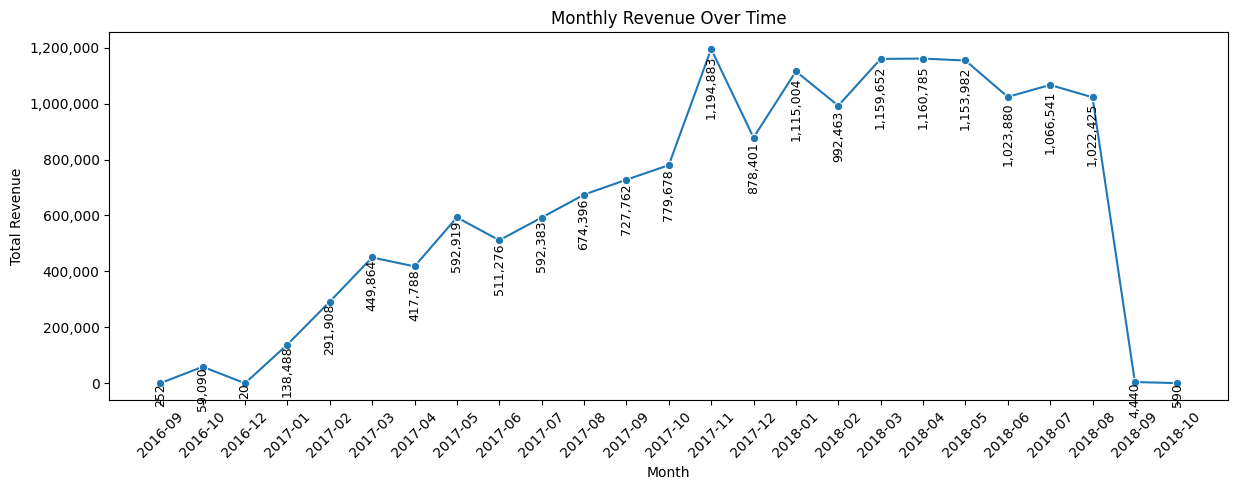

In [23]:
# Revenue over time (by month)
# Merge payments with orders to get purchase date
payments_with_date = payments.merge(orders[["order_id", "order_purchase_timestamp"]], on="order_id", how="left")
payments_with_date["order_purchase_month"] = payments_with_date["order_purchase_timestamp"].dt.to_period("M")

monthly_revenue = payments_with_date.groupby("order_purchase_month")["payment_value"].sum().reset_index()
monthly_revenue["order_purchase_month"] = monthly_revenue["order_purchase_month"].astype(str)

plt.figure(figsize=(12, 5))
ax = sns.lineplot(data=monthly_revenue, x="order_purchase_month", y="payment_value", marker="o")
plt.title("Monthly Revenue Over Time")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()

#  Force y-axis to display actual values with commas
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

#  Add labels under each point
for x, y in zip(monthly_revenue["order_purchase_month"], monthly_revenue["payment_value"]):
    plt.text(x, y - (y * 0.02), f'{y:,.0f}', ha='center', va='top', fontsize=9, rotation=90)
    # y - (y * 0.02) shifts label down by 2% of the value

plt.show()




## Overview

The line chart presents monthly revenue from **September 2016 to October 2018**. Initially, the business generated minimal revenue—₲252 in Sep 2016. From **January 2017**, revenue steadily increased, reaching a peak in **March 2018** with **₲1,159,652**. From **January to August 2018**, revenue remained stable above ₲1M, suggesting a period of business maturity and consistency.

However, this trend sharply reverses with a **dramatic decline** in the final two months:
- **September 2018**: ₲440
- **October 2018**: ₲50

This sudden drop suggests a **potential data error**, platform outage, or operational disruption rather than a natural business trend.

##  Key Insight (Detailed)

-  **Growth Phase**: Jan 2017 (₲138,488) → Nov 2017 (₲1,194,883)
-  **Stability Phase**: Jan 2018 – Aug 2018 (₲1M+ revenue consistently)
-  **Anomaly**: Sep 2018 (₲440), Oct 2018 (₲50) — unusual crash requiring immediate review
-  **Seasonal Peak**: Nov 2017 suggests influence from Black Friday or holiday campaigns

##  Business Recommendations

### 1. Investigate Revenue Drop
- **Audit system logs and pipelines** for potential API/data ingestion failures after August 2018.
- Verify if there were **operational shutdowns**, seller issues, or reporting misconfigurations.

### 2. Replicate Peak Performance
- Review campaigns, pricing strategies, and seller activity during **Nov 2017 – Mar 2018**.
- **Scale successful tactics** (e.g., promotions, bundling, shipping incentives).

### 3. Leverage Seasonality
- Plan for **Q4 surges**: Black Friday, Christmas, and year-end clearance sales.
- Introduce **time-sensitive offers, flash deals**, or themed bundles to capture demand.

### 4. Build Forecasting Models
- Use the **Jan 2017–Aug 2018** trend to build **predictive revenue models**.
- This enables better **cash flow planning**, inventory allocation, and marketing budgeting.


3.Correlate lead qualification to closed deals and revenue outcomes

Goal : Understand how qualified leads turn into closed deals and how much revenue they generate.

In [24]:
leads_qualified.head()

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2/1/2018,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,10/20/2017,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,3/22/2018,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,1/22/2018,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2/21/2018,b48ec5f3b04e9068441002a19df93c6c,organic_search


In [25]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,2017-10-10 21:25:00,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,7/26/2018 3:24,7/26/2018 14:31,2018-08-07 15:27:00,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,8/8/2018 8:55,8/8/2018 13:50,2018-08-17 18:06:00,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,11/18/2017 19:45,11/22/2017 13:39,2017-12-02 00:28:00,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,2/13/2018 22:20,2/14/2018 19:46,2018-02-16 18:17:00,2018-02-26


In [26]:
orders.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,2017-10-10 21:25:00,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,7/26/2018 3:24,7/26/2018 14:31,2018-08-07 15:27:00,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,8/8/2018 8:55,8/8/2018 13:50,2018-08-17 18:06:00,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,11/18/2017 19:45,11/22/2017 13:39,2017-12-02 00:28:00,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,2/13/2018 22:20,2/14/2018 19:46,2018-02-16 18:17:00,2018-02-26


Qualified Leads vs Closed Deals

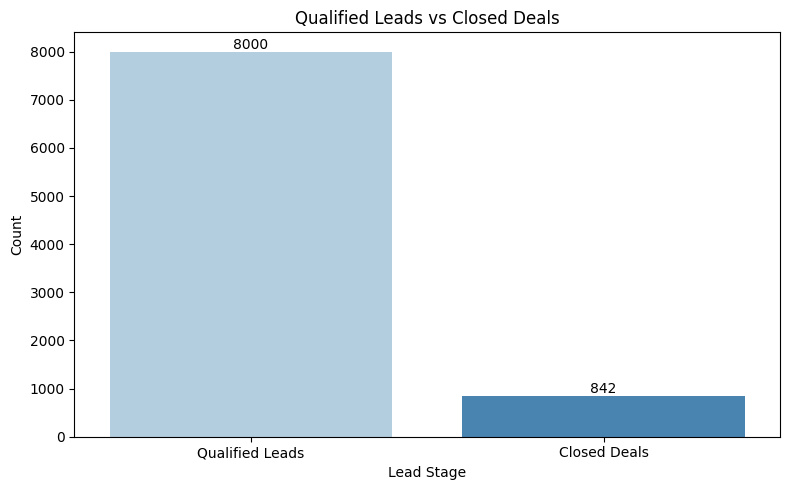

Qualified Leads: 8,000
Closed Deals: 842
Conversion Rate: 10.53%


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Merge leads_qualified with leads_closed on 'mql_id'
leads_qualified_closed = leads_qualified.merge(
    leads_closed, on='mql_id', how='left', suffixes=('_qualified', '_closed')
)

# Add a flag: True if the lead was closed, False if not
leads_qualified_closed['is_closed'] = ~leads_qualified_closed['seller_id'].isna()

# Calculate conversion rate
conversion_rate = leads_qualified_closed['is_closed'].mean() * 100

# Prepare counts for plotting
lead_counts = pd.DataFrame({
    'Lead Stage': ['Qualified Leads', 'Closed Deals'],
    'Count': [len(leads_qualified), leads_qualified_closed['is_closed'].sum()]
})

# Plot Qualified Leads vs Closed Deals
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=lead_counts, x='Lead Stage', y='Count', palette='Blues')

plt.title('Qualified Leads vs Closed Deals')
plt.ylabel('Count')
plt.xlabel('Lead Stage')
plt.tight_layout()

# Add count labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.show()

# Print summary
print(f"Qualified Leads: {len(leads_qualified):,}")
print(f"Closed Deals: {int(leads_qualified_closed['is_closed'].sum()):,}")
print(f"Conversion Rate: {conversion_rate:.2f}%")


#  Lead Conversion Funnel Analysis

##  Overview

This chart compares the number of **qualified leads** to **closed deals**, revealing a significant disparity in the sales funnel. Out of **8,000 qualified leads**, only **842** were converted into closed deals, resulting in a **conversion rate of approximately 10.5%**. This indicates that while lead generation and qualification are working effectively, the challenge lies in moving these leads through the final stages of the funnel toward actual purchase. There may be critical breakdowns in follow-up, nurturing, offer alignment, or even product-market fit.

##  Key Insight

- **Qualified Leads**: 8,000  
- **Closed Deals**: 842  
- **Conversion Rate**:  
  \[
  \frac{842}{8000} \times 100 = 10.525\%
  \]

This means nearly **90% of qualified leads are not converting**, which strongly suggests potential gaps in closing strategies, communication, or product alignment with customer needs.

##  Business Recommendations

### 1. Diagnose Drop-Off Causes
- Perform a **sales funnel analysis** to identify where leads are exiting post-qualification.
- Leverage **CRM data, sales call transcripts, and survey feedback** to uncover pain points and objections.

### 2. Improve Lead Nurturing
- Implement **automated email workflows** and **personalized follow-ups** to keep leads warm.
- Provide **educational content** (e.g., webinars, case studies) that builds trust and moves leads closer to purchase.
- Equip reps with **sales enablement materials** that address FAQs and common objections.

### 3. Reassess Qualification Criteria
- Reevaluate the **lead scoring model** to ensure only **sales-ready prospects** are being passed on.
- Introduce a **secondary qualification layer** (e.g., discovery call or intent scoring) to refine quality.

### 4. Strengthen Sales Team Closing Skills
- Offer training on **objection handling, value articulation, and urgency creation**.
- Align performance incentives more closely with **deal closures**, not just lead generation.



Top 10 Sellers by Revenue from Closed Leads

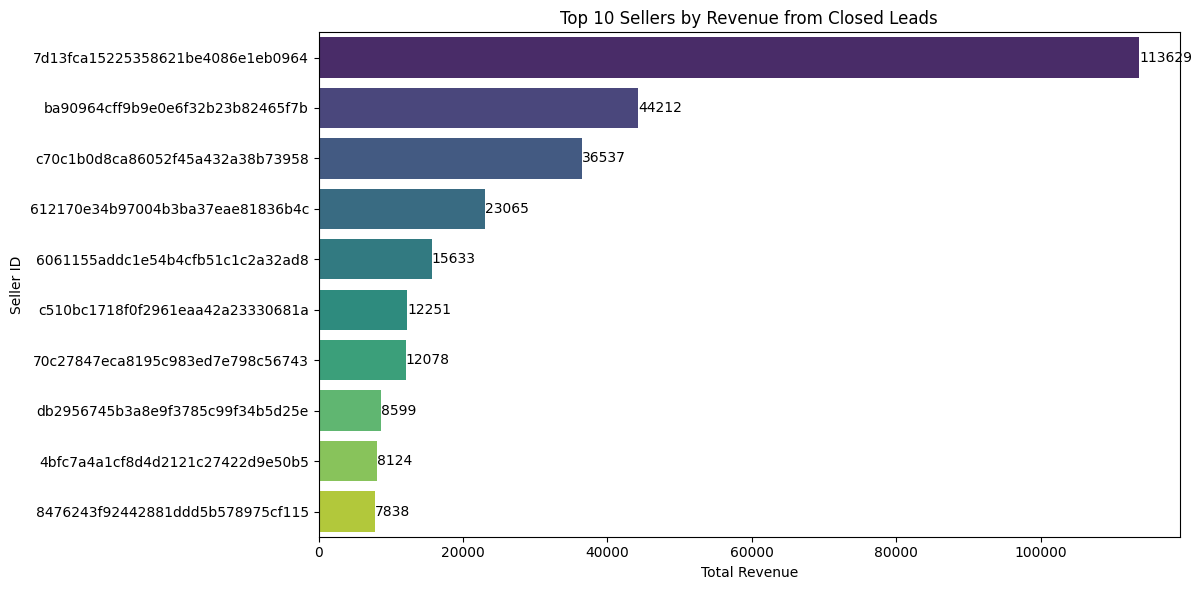

Total Revenue from Sellers Who Closed Leads: 676,851.48
Number of Sellers Who Closed Leads: 842


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate revenue per seller from order items
seller_revenue = items.groupby('seller_id')['price'].sum().reset_index()
seller_revenue.rename(columns={'price': 'total_revenue'}, inplace=True)

# Step 2: Merge leads_closed with seller revenue using seller_id
leads_with_revenue = leads_closed.merge(seller_revenue, on='seller_id', how='left')

# Step 3: Summarize total revenue from sellers who closed leads
total_revenue_from_leads = leads_with_revenue['total_revenue'].sum()

# Step 4: Summarize revenue per seller from closed leads
seller_revenue_summary = leads_with_revenue.groupby('seller_id')['total_revenue'].sum().reset_index()

# Sort sellers by total revenue
top_sellers = seller_revenue_summary.sort_values(by='total_revenue', ascending=False).head(10)

# Plot: Top 10 Sellers by Revenue from Closed Leads
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_sellers, x='total_revenue', y='seller_id', palette='viridis')
plt.title('Top 10 Sellers by Revenue from Closed Leads')
plt.xlabel('Total Revenue')
plt.ylabel('Seller ID')
plt.tight_layout()

# Add revenue labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.show()

# Print Summary
print(f"Total Revenue from Sellers Who Closed Leads: {total_revenue_from_leads:,.2f}")
print(f"Number of Sellers Who Closed Leads: {leads_with_revenue['seller_id'].nunique()}")


#  Seller Performance Based on Closed Lead Revenue

##  Overview

This bar chart ranks the **top 10 sellers** by total revenue generated from **closed leads**. The analysis reveals a strong revenue concentration among a few individuals. The **top seller (ID: 7d13fca...)** generated **₲113,629**, which is significantly higher than the second-highest performer, who earned **₲44,212**—a **61% drop** from the leader. The seller at the bottom of the top 10 contributed only **₲7,838**. 

This steep revenue distribution suggests varying levels of **sales effectiveness**, possibly due to differences in **sales skills, follow-up strategies, or lead quality**. The pattern resembles a classic **Pareto (80/20) distribution**, where a small group drives the majority of results.

##  Key Insight

-  **Top Seller Revenue**: ₲113,629  
-  **Second Seller Revenue**: ₲44,212 (↓61%)  
-  **10th Seller Revenue**: ₲7,838  
-  **Top 3 Sellers Combined**: Over ₲194,000  

This reveals a **high-performance concentration**, with top sellers dominating the closed deal revenue landscape.

##  Business Recommendations

### 1. Replicate Top Seller Strategies
- Conduct **interviews or shadowing sessions** with the top 3 sellers.
- Document their **scripts, follow-up cadence, CRM usage**, and customer engagement style.
- Use insights to create **training playbooks or onboarding templates** for the broader team.

### 2. Balance Lead Distribution
- Audit your **lead routing logic** to prevent oversaturation of top sellers (unless intentional).
- Ensure **fair and strategic lead assignment** based on opportunity scoring and seller bandwidth.

### 3. Introduce Performance-Based Incentives
- Implement **tiered rewards systems** that motivate all sellers—not just the top 10%.
- Tie bonuses and recognition to **revenue output** rather than just deal count.

### 4. Support Underperformers
- Identify sellers earning less than ₲12,000 and offer **coaching sessions or peer mentoring**.
- Use **conversion rate analysis per seller** to pinpoint weak spots in sales execution.
- Offer tools and scripts proven effective by top performers.



# Delivery & Logistics:

1. Goal: Compare estimated vs. actual delivery dates to measure delivery efficiency

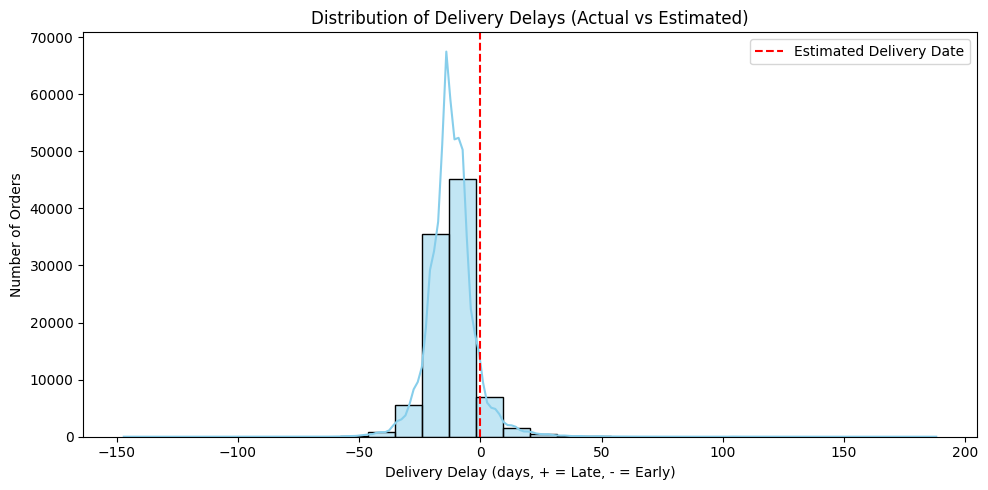

Total Deliveries: 96,476
Late Deliveries: 6,535 (6.77%)
On-Time or Early Deliveries: 89,941 (93.23%)


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the orders dataset (make sure dates are datetime type)
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'], errors='coerce')
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'], errors='coerce')

# Remove rows with missing delivery dates
valid_deliveries = orders.dropna(subset=['order_delivered_customer_date', 'order_estimated_delivery_date']).copy()

# Calculate delivery delay (in days)
valid_deliveries['delivery_delay'] = (valid_deliveries['order_delivered_customer_date'] - valid_deliveries['order_estimated_delivery_date']).dt.days

# Plot the distribution of delivery delays
plt.figure(figsize=(10, 5))
sns.histplot(valid_deliveries['delivery_delay'], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Delivery Delays (Actual vs Estimated)")
plt.xlabel("Delivery Delay (days, + = Late, - = Early)")
plt.ylabel("Number of Orders")
plt.axvline(0, color='red', linestyle='--', label='Estimated Delivery Date')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate summary statistics
Total_deliveries = len(valid_deliveries)
late_deliveries = (valid_deliveries['delivery_delay'] > 0).sum()
on_time_or_early = (valid_deliveries['delivery_delay'] <= 0).sum()
late_percentage = (late_deliveries / Total_deliveries) * 100

# Print results
print(f"Total Deliveries: {Total_deliveries:,}")
print(f"Late Deliveries: {late_deliveries:,} ({late_percentage:.2f}%)")
print(f"On-Time or Early Deliveries: {on_time_or_early:,} ({100 - late_percentage:.2f}%)")




##  Overview

This distribution chart visualizes how **actual delivery times** compare against **estimated delivery dates**. The x-axis represents the difference in days between the actual and estimated delivery, with **zero marked by a red vertical line**. A large cluster of deliveries appears around this zero mark, indicating **most orders arrived on time or early**. The histogram is slightly **left-skewed**, suggesting **early deliveries** are more frequent than late ones. However, there is a small tail on the right side, representing **significant delays** in some cases.

##  Key Insights

-  **Most deliveries** fall within a **-10 to +10 day window** around the estimated delivery date.
- There is a **slight skew toward early deliveries**, indicating strong performance by sellers/couriers.
-  A **small number of orders** are delayed by **20+ days**, which may point to **logistical issues or exceptions**.

##  Business Recommendations

### 1. Refine Delivery Time Estimates
- Leverage **historical delivery data** to recalibrate estimated delivery dates.
- Provide **more realistic timeframes** at checkout, improving customer expectations and reducing perceived lateness.

### 2. Investigate Repeated Late Deliveries
- Identify orders **delayed by 15+ days** and flag associated **sellers or couriers**.
- Conduct **audits or performance reviews** to uncover process gaps, geographic challenges, or system bottlenecks.



2.Goal :Highlight cities or states with frequent delays

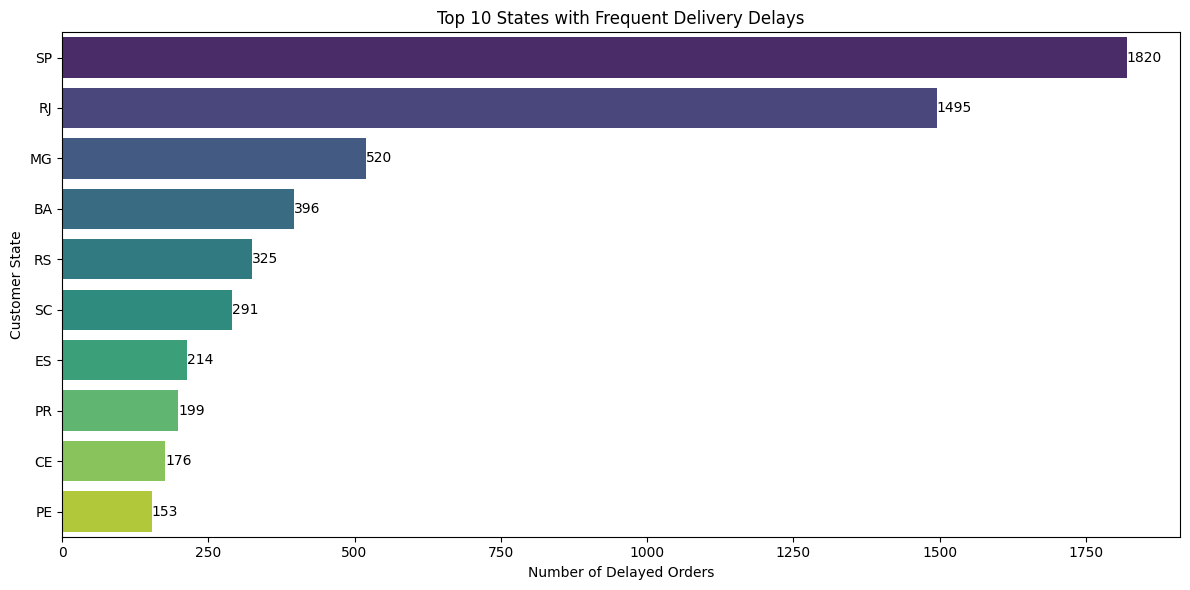

Total Deliveries: 96,476
Late Deliveries: 6,535 (6.77%)
On-Time or Early Deliveries: 89,941 (93.23%)


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#  Identify top cities/states with frequent delays
# Only keep delayed deliveries

# Prepare the delivery dataset (make sure dates are datetime)
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'], errors='coerce')
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'], errors='coerce')

# Calculate delivery difference in days
orders['delivery_diff_days'] = (orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']).dt.days

# Remove missing values
delivery_data = orders.dropna(subset=['delivery_diff_days']).copy()

# Merge with customers to get customer state
delivery_data = delivery_data.merge(customers[['customer_id', 'customer_state']], on='customer_id', how='left')

# Only keep delayed deliveries
delayed_orders = delivery_data[delivery_data['delivery_diff_days'] > 0]

# Calculate delay frequency per state
state_delay = delayed_orders.groupby('customer_state')['delivery_diff_days'].count().reset_index()
state_delay = state_delay.sort_values(by='delivery_diff_days', ascending=False).head(10)

# Plot top states with frequent delays
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=state_delay, x='delivery_diff_days', y='customer_state', palette='viridis')
plt.title('Top 10 States with Frequent Delivery Delays')
plt.xlabel('Number of Delayed Orders')
plt.ylabel('Customer State')
plt.tight_layout()

# Add labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.show()

# Calculate summary statistics
late_deliveries = (delivery_data['delivery_diff_days'] > 0).sum()
on_time_or_early = (delivery_data['delivery_diff_days'] <= 0).sum()
total_deliveries = late_deliveries + on_time_or_early
late_percentage = (late_deliveries / total_deliveries) * 100

# Print summary
print(f"Total Deliveries: {total_deliveries:,}")
print(f"Late Deliveries: {late_deliveries:,} ({late_percentage:.2f}%)")
print(f"On-Time or Early Deliveries: {on_time_or_early:,} ({100 - late_percentage:.2f}%)")




##  Overview

This bar chart highlights the **top 10 Brazilian states** with the highest frequency of **delivery delays**. The data shows a strong concentration of delayed deliveries in **São Paulo (SP)** with **1,820 delays**, followed by **Rio de Janeiro (RJ)** with **1,495 delays**. Other states, including **Minas Gerais (MG)**, **Bahia (BA)**, and **Rio Grande do Sul (RS)**, have noticeably fewer delays, indicating that **delivery issues are highly regionalized**.

These delays are likely correlated with **high order volumes**, **urban congestion**, or **logistics infrastructure limitations** in major population centers.

##  Key Insights

-  **São Paulo (SP)** and **Rio de Janeiro (RJ)** lead with **1,820** and **1,495** delayed orders, respectively.
-  There is a significant drop to **Minas Gerais (MG)** at **520**, indicating delays are **concentrated in a few urban hubs**.
-  States further down (e.g., **Pernambuco (PE)** with **153**) still report **consistent delays**, suggesting inefficiencies even in **smaller logistics regions**.

##  Business Recommendations

### 1. Improve Logistics Infrastructure in SP & RJ
- Collaborate with **local delivery partners** to increase efficiency.
- Consider establishing **micro-fulfillment centers** or **local hubs** to reduce last-mile delivery time in high-density areas.

### 2. Launch State-Specific Delivery KPIs
- Introduce **performance dashboards** and **SLAs** for couriers in high-delay states.
- Incentivize faster, more reliable delivery through **state-level metrics** tied to bonuses or penalties.



# Review & Satisfaction Insights


1.Analyze the distribution of review scores by product category or seller

In [31]:
category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


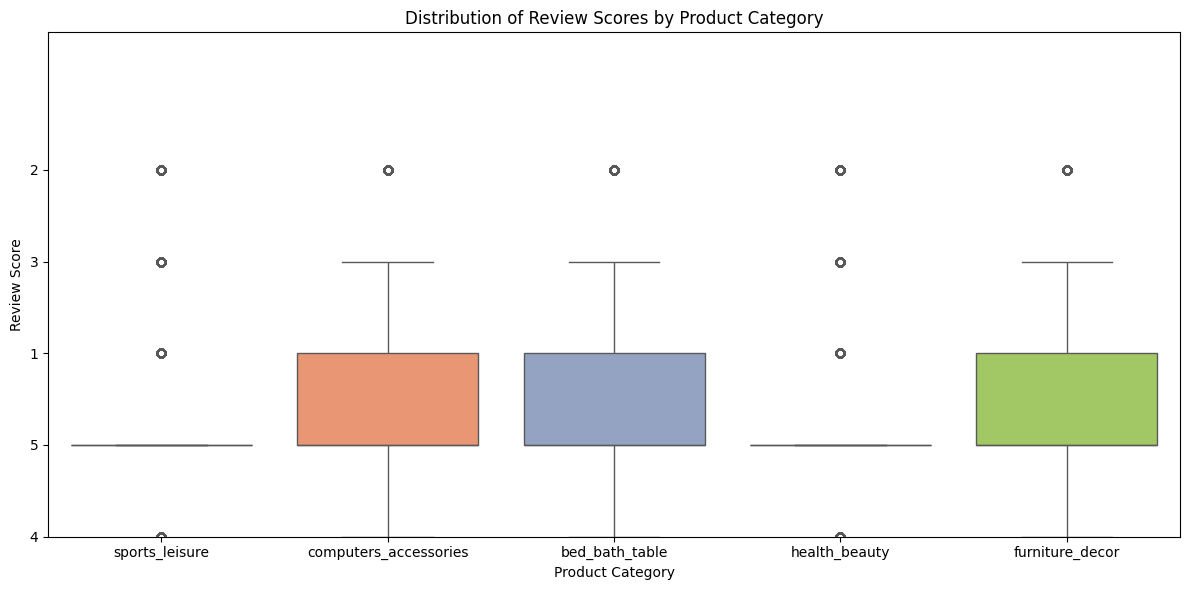

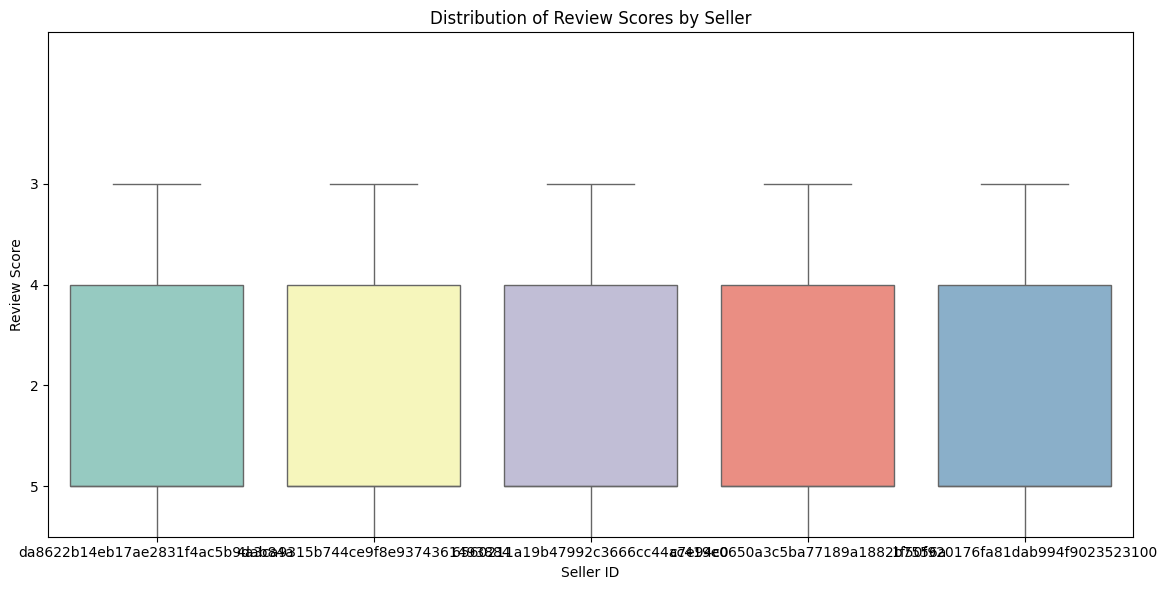

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- PART 1: Review Scores by Product Category and Seller ---

# Merge reviews with order_items to get seller_id and product_id
reviews = reviews.merge(items, on='order_id', how='left')

# Merge with products and category to get product category names
reviews = reviews.merge(products, on='product_id', how='left') \
                             .merge(category, on='product_category_name', how='left')

# --- Plot: Distribution of Review Scores by Product Category ---
top_categories = reviews['product_category_name_english'].value_counts().head(5).index.tolist()
filtered_reviews = reviews[reviews['product_category_name_english'].isin(top_categories)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_reviews, x='product_category_name_english', y='review_score', palette='Set2')
plt.title('Distribution of Review Scores by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Review Score')
plt.ylim(0, 5.5)
plt.tight_layout()
plt.show()

# --- Plot: Distribution of Review Scores by Top Sellers ---
top_sellers = reviews['seller_id'].value_counts().head(5).index.tolist()
filtered_seller_reviews = reviews[reviews['seller_id'].isin(top_sellers)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_seller_reviews, x='seller_id', y='review_score', palette='Set3')
plt.title('Distribution of Review Scores by Seller')
plt.xlabel('Seller ID')
plt.ylabel('Review Score')
plt.ylim(0.5, 5.5)
#plt.ylim(0, 5.5)
plt.tight_layout()
plt.show()







##  Overview

Customer review scores are essential indicators of both **product quality** and **service satisfaction**. This analysis uses **box plots** to compare review distributions across different **product categories** and **sellers**. The y-axis is **inverted**, meaning **higher scores appear lower** on the chart. Despite this visual inversion, the data reveals a **consistently strong performance**—with most categories and sellers maintaining a **median review score of 5**.

##  Key Insights

###  Product Categories
- **sports_leisure** and **health_beauty** show **tight, high-performing score distributions**, with the majority of reviews at **5 stars**.
- Categories like **bed_bath_table** and **computers_accessories** display **wider variation** and contain **low-score outliers (1–2)**, indicating occasional dissatisfaction.

###  Sellers
- All **top sellers** maintain a **median score of 5**, demonstrating generally **excellent customer satisfaction**.
- **Outliers** (scores of 1–2) appear across all sellers but seem to represent **isolated incidents** rather than systemic issues.

##  Business Recommendations

### 1. Investigate Negative Outliers in Key Categories
- Focus on categories with visible **review score variance**, especially **computers_accessories**.
- Perform **root cause analysis** on low ratings via **customer feedback, returns data, or support tickets**.
- Consider **supplier re-evaluation** or **product quality audits** to reduce low-score occurrences.

### 2. Incentivize High-Performing Sellers
- Create **recognition programs** or **badge systems** to reward sellers with consistently high ratings.
- **Feature top-rated sellers** in promotions or homepage sections to reinforce a **culture of excellence**.


2.Determine if longer delivery times impact review sentiment

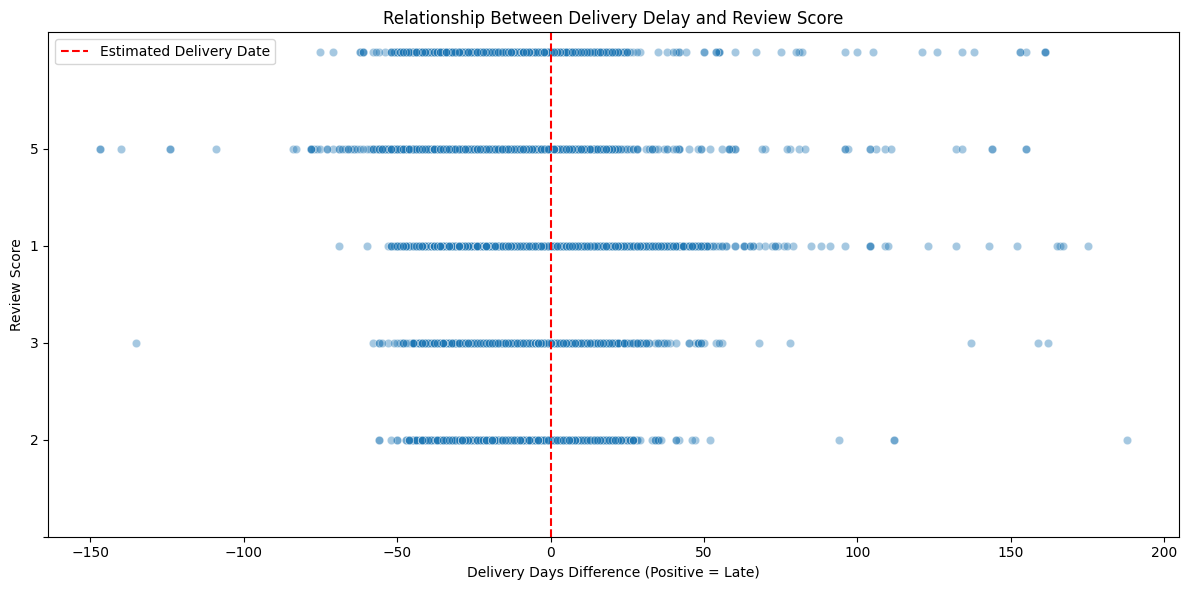

Correlation between delivery delay and review score: -0.23


In [33]:
# --- PART 2: Impact of Delivery Time on Review Sentiment ---

# Prepare delivery dataset
delivery_data = orders.copy()
delivery_data['order_delivered_customer_date'] = pd.to_datetime(delivery_data['order_delivered_customer_date'], errors='coerce')
delivery_data['order_estimated_delivery_date'] = pd.to_datetime(delivery_data['order_estimated_delivery_date'], errors='coerce')
delivery_data['delivery_diff_days'] = (delivery_data['order_delivered_customer_date'] - delivery_data['order_estimated_delivery_date']).dt.days

# Merge delivery data with reviews
delivery_reviews = reviews.merge(delivery_data[['order_id', 'delivery_diff_days']], on='order_id', how='left')

# Clean missing delivery_diff_days
delivery_reviews = delivery_reviews.dropna(subset=['delivery_diff_days'])

# Plot: Delivery Delay vs Review Score
plt.figure(figsize=(12, 6))
sns.scatterplot(data=delivery_reviews, x='delivery_diff_days', y='review_score', alpha=0.4)
plt.title('Relationship Between Delivery Delay and Review Score')
plt.xlabel('Delivery Days Difference (Positive = Late)')
plt.ylabel('Review Score')
plt.axvline(0, color='red', linestyle='--', label='Estimated Delivery Date')
plt.yticks(np.arange(1, 6, 1))
plt.legend()
plt.tight_layout()
plt.show()

# Optional: Calculate correlation
correlation = delivery_reviews['delivery_diff_days'].corr(delivery_reviews['review_score'])
print(f"Correlation between delivery delay and review score: {correlation:.2f}")



##  Overview

This scatter plot explores the relationship between **delivery delays** (x-axis) and **customer review scores** (y-axis).  
- The **x-axis** represents days from the estimated delivery date:
  - **0** = on-time delivery  
  - **Negative values** = early delivery  
  - **Positive values** = delays  
- The **y-axis** captures customer sentiment on a 1–5 star scale.

The visualization helps assess how **delivery timeliness influences satisfaction**.

##  Key Insights

-  **5-star reviews** cluster heavily around **early and on-time deliveries**, with tolerance extending up to **~20 days late**.
-  **1-star reviews** become more frequent **after +20 days of delay**, highlighting a **strong negative sentiment** from significant lateness.
-  There is a **visible downward trend** in review scores as delivery delay increases—**timeliness is a major driver of customer satisfaction**.

##  Business Recommendations

### 1. Improve Logistics Predictability
- Partner with **reliable carriers** and invest in **warehouse process optimization** to reduce lead time variance.
- Introduce **predictive models** that dynamically estimate delivery time based on location, order load, and past performance.

### 2. Proactive Customer Communication
- Implement **real-time order tracking** and send alerts if a delay is anticipated.
- Offer **compensations** (e.g., discount vouchers, free shipping on next order) for significantly late deliveries to **preserve trust**.
- Set **expectations clearly** at checkout with realistic delivery windows.



Geospatial visualization of seller vs. customer locations to suggest delivery optimization

In [ ]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Prepare customer locations
customers_geo = pd.merge(
    customers,
    location[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']],
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='left'
)

# Drop customers with missing location
customers_geo = customers_geo.dropna(subset=['geolocation_lat', 'geolocation_lng'])

# Prepare seller locations
sellers_geo = pd.merge(
    sellers,
    location[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']],
    left_on='seller_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='left'
)

# Drop sellers with missing location
sellers_geo = sellers_geo.dropna(subset=['geolocation_lat', 'geolocation_lng'])

# Initialize the map centered in Brazil
map_center = [-14.2350, -51.9253]
delivery_map = folium.Map(location=map_center, zoom_start=4)

# Add customer markers
customer_cluster = MarkerCluster(name='Customers').add_to(delivery_map)
for idx, row in customers_geo.iterrows():
    folium.CircleMarker(
        location=[row['geolocation_lat'], row['geolocation_lng']],
        radius=2,
        color='blue',
        fill=True,
        fill_opacity=0.4,
        popup=f"Customer ID: {row['customer_id']}"
    ).add_to(customer_cluster)

# Add seller markers
seller_cluster = MarkerCluster(name='Sellers').add_to(delivery_map)
for idx, row in sellers_geo.iterrows():
    folium.CircleMarker(
        location=[row['geolocation_lat'], row['geolocation_lng']],
        radius=5,
        color='red',
        fill=True,
        fill_opacity=0.8,
        popup=f"Seller ID: {row['seller_id']}"
    ).add_to(seller_cluster)

# Add layer control
folium.LayerControl().add_to(delivery_map)

# Show map
delivery_map


KPI DASHBOARD

In [ ]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd



# ----- KPI Calculations -----

# Total Revenue
total_revenue = payments['payment_value'].sum()

# Late Deliveries
late_deliveries = orders[orders['delivery_diff_days'] > 0].shape[0]
total_deliveries = orders['order_id'].nunique()
late_percentage = (late_deliveries / total_deliveries) * 100

# Average Review Score
reviews['review_score'] = pd.to_numeric(reviews['review_score'], errors='coerce')
average_review_score = reviews['review_score'].mean()

# Lead Conversion Rate
qualified_leads = leads_qualified['mql_id'].nunique()
closed_leads = leads_closed['mql_id'].nunique()
lead_conversion_rate = (closed_leads / qualified_leads) * 100 if qualified_leads > 0 else 0

# Top Product Categories
merged_items = items.merge(products, on='product_id', how='left') \
                    .merge(category, on='product_category_name', how='left')

category_sales = merged_items.groupby('product_category_name_english')['price'].sum().reset_index()
category_sales = category_sales.sort_values(by='price', ascending=False).head(10)

category_fig = px.bar(category_sales, x='price', y='product_category_name_english', orientation='h',
                      title='Top 10 Product Categories by Sales')

# ----- Dash App Setup -----

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1('Business KPI Dashboard', style={'textAlign': 'center'}),

    # KPI Cards
    html.Div([
        html.Div([
            html.H3('Total Revenue'),
            html.P(f'R$ {total_revenue:,.2f}')
        ], style={'padding': '20px', 'backgroundColor': '#f0f0f0', 'margin': '10px'}),

        html.Div([
            html.H3('Late Deliveries'),
            html.P(f'{late_percentage:.2f}% Late')
        ], style={'padding': '20px', 'backgroundColor': '#f0f0f0', 'margin': '10px'}),

        html.Div([
            html.H3('Average Review Score'),
            html.P(f'{average_review_score:.2f}')
        ], style={'padding': '20px', 'backgroundColor': '#f0f0f0', 'margin': '10px'}),

        html.Div([
            html.H3('Lead Conversion Rate'),
            html.P(f'{lead_conversion_rate:.2f}%')
        ], style={'padding': '20px', 'backgroundColor': '#f0f0f0', 'margin': '10px'}),
    ], style={'display': 'flex', 'justifyContent': 'space-around'}),

    html.Br(),

    # Sales Chart
    html.Div([
        dcc.Graph(figure=category_fig)
    ])
])

# ----- Run App -----
if __name__ == '__main__':
    app.run(debug=True)


#  A/B Testing Framework for Funnel & Product Optimization

This section outlines five A/B test opportunities to improve customer conversion, satisfaction, and post-purchase engagement. Each test aligns with available project data and targets specific funnel or product-level behaviors.

---

## 1️ Lead Funnel A/B Test: Qualification Strategy

###  Opportunity
Test different lead qualification strategies to identify which approach drives higher conversion from **leads_qualified → leads_closed**.

###  Test Design
- **Group A**: Basic qualification form (short info)
- **Group B**: Detailed qualification form (more fields)

###  Why
More detailed input may indicate higher lead intent or allow better filtering, potentially improving conversion rates.

###  Success Metric
- **Primary**: Conversion Rate = leads_closed / leads_qualified
- **Secondary**: Time to close

---

## 2️ Lead Funnel A/B Test: Contact Timing

###  Opportunity
Test how quickly contacting a lead after qualification affects deal closure.

###  Test Design
- **Group A**: Contact within **1 hour**
- **Group B**: Contact after **24 hours**

###  Why
Timely follow-up might increase customer engagement and accelerate the closing process.

###  Success Metrics
- **Primary**: Conversion Rate
- **Secondary**: Average Time to Close

---

## 3️ Product-Level A/B Test: Delivery Estimate Messaging

###  Opportunity
Examine how the framing of delivery estimates affects customer satisfaction.

###  Test Design
- **Group A**: Show the **fastest possible** delivery date
- **Group B**: Show a **conservative (buffered)** delivery date

###  Why
Delivering earlier than expected can positively influence customer perception and review scores.

###  Success Metrics
- **Primary**: Average Review Score
- **Secondary**: Review Volume / Customer Complaints

---

## 4️ Product-Level A/B Test: Discount Visibility

###  Opportunity
Test how the timing and placement of discount visibility affects purchasing behavior.

###  Test Design
- **Group A**: Show discount **on product page**
- **Group B**: Show discount **at checkout only**

###  Why
Early visibility may increase urgency and purchase likelihood, while delayed visibility may reduce price-driven shopping behavior.

###  Success Metrics
- **Primary**: Purchase Rate
- **Secondary**: Total Revenue per Session

---

## 5️ Post-Purchase A/B Test: Review Request Timing

###  Opportunity
Test the optimal timing for review request emails to maximize engagement and sentiment.

###  Test Design
- **Group A**: Send request **immediately after delivery**
- **Group B**: Send request **3 days post-delivery**

###  Why
A slight delay might allow for product usage and reflection, leading to more thoughtful and positive reviews.

###  Success Metrics
- **Primary**: Review Submission Rate
- **Secondary**: Average Review Score





